# Breast Cancer Classification ANN

In [1]:
#importing libraries
!pip install tensorflow

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv(r"C:\Users\saiso\Downloads\Breast Cancer Classification\data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


* **Insights:**
* There are total of 569 entries and 33 columns, of which id and unnamed:32 do not hold any importance therefore we will drop.

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

<Axes: xlabel='diagnosis', ylabel='count'>

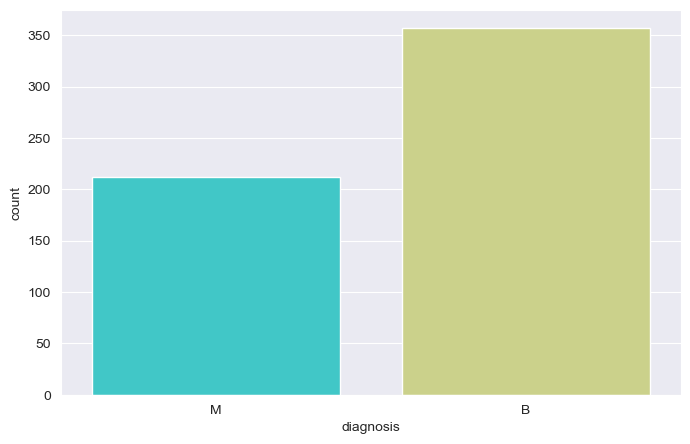

In [6]:
#visualizing the distribution data from Malignant or benign
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df,palette='rainbow')

In [7]:
#encoding the target variable,{M:1 and B:0}
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

<Axes: >

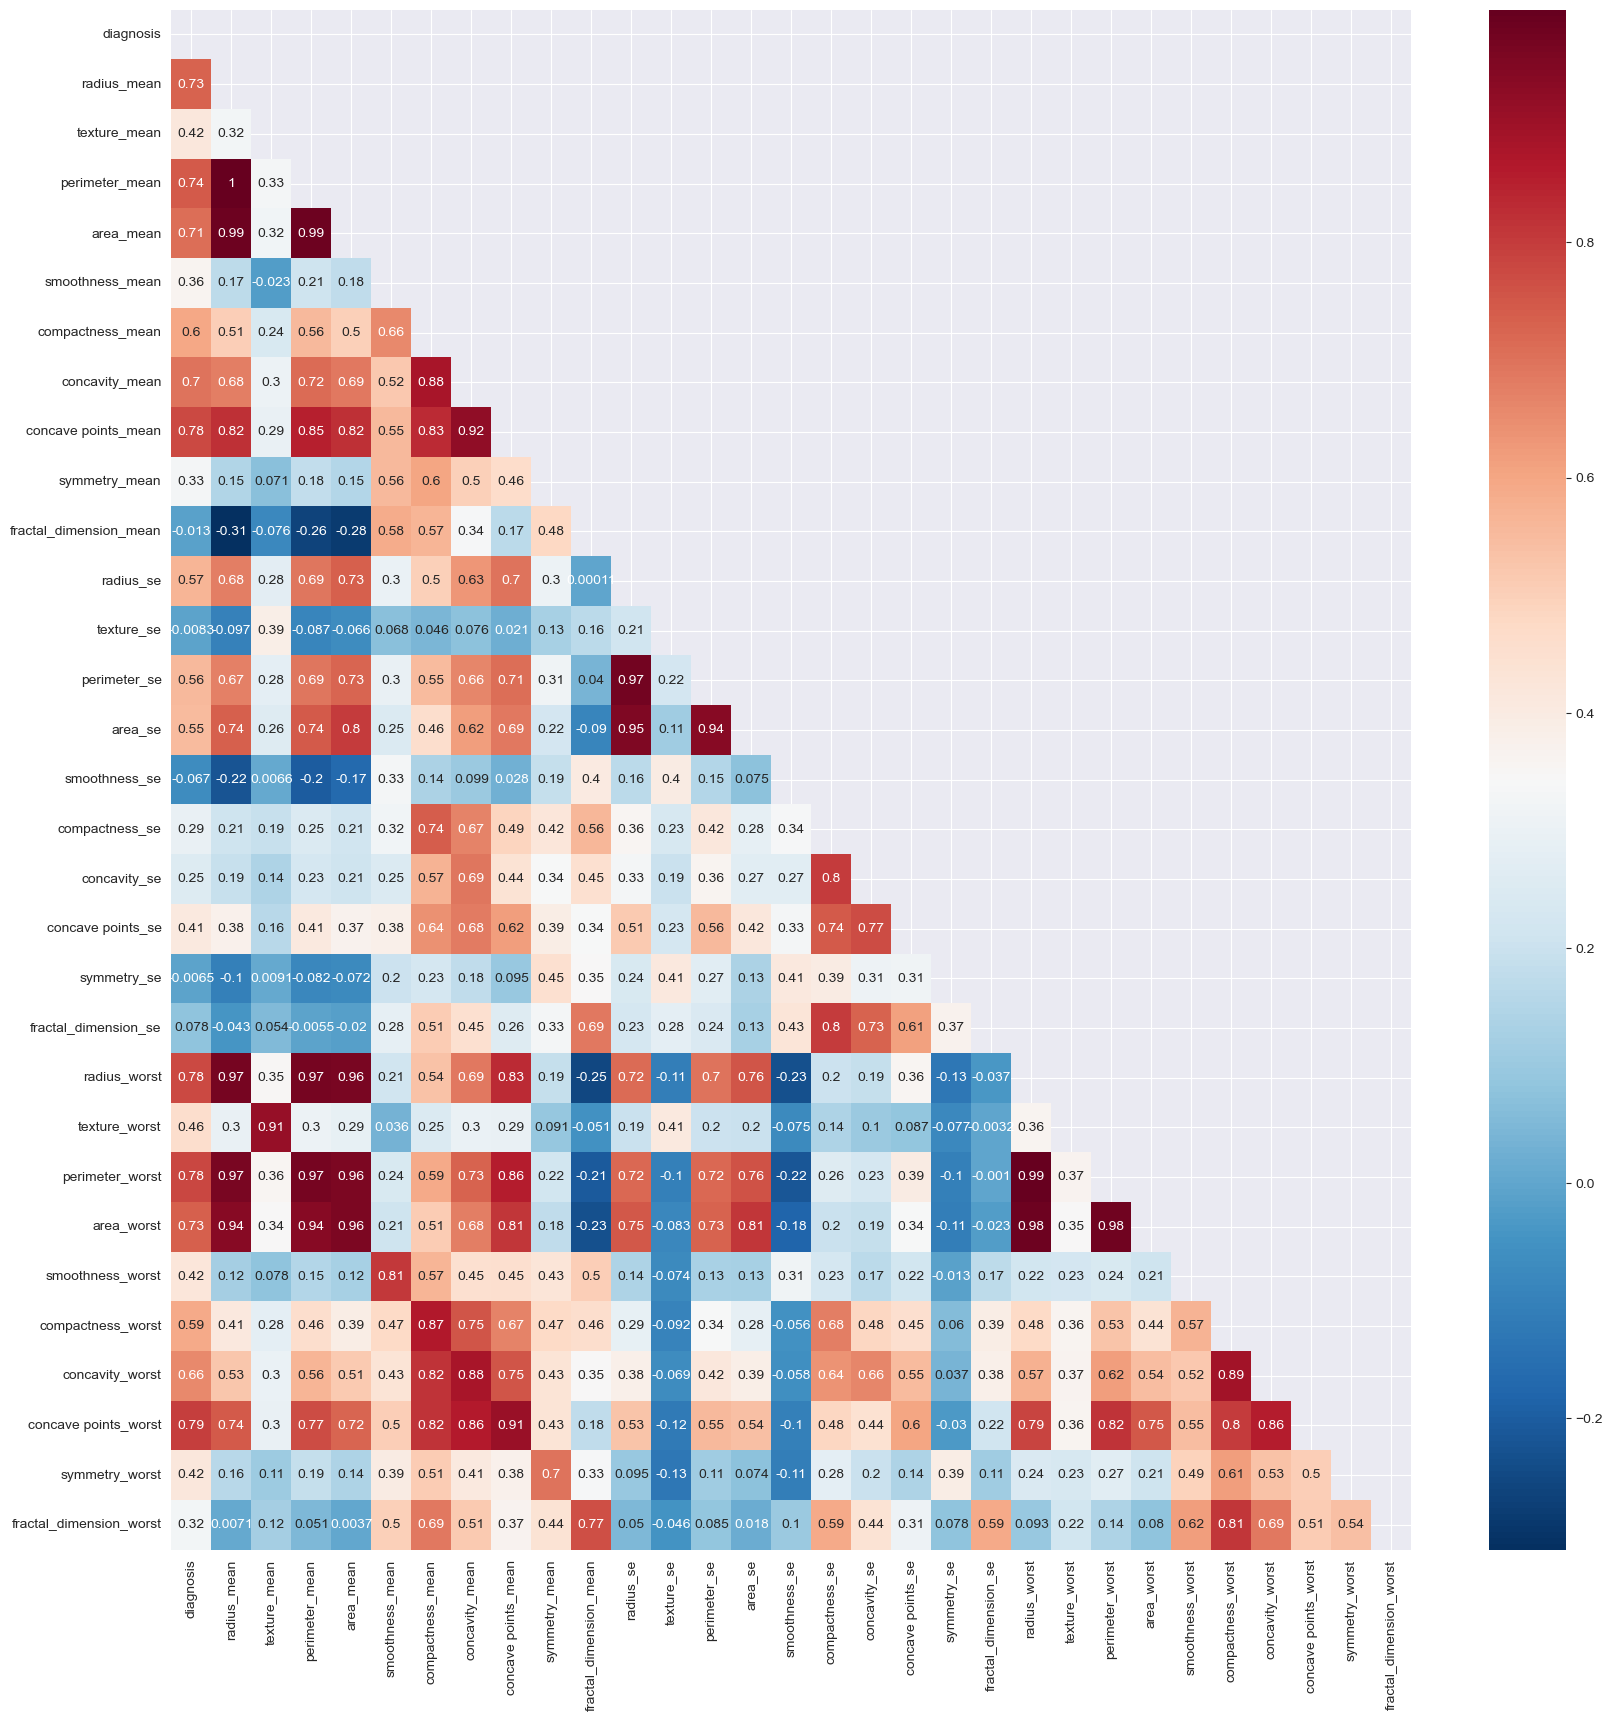

In [8]:
plt.figure(figsize=(20,20))
corr=df.corr()
msk = np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

In [9]:
#separating target and independent features
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)

In [10]:
#scaling the dataset
scaler_=StandardScaler()
X=pd.DataFrame(scaler_.fit_transform(X),columns=X.columns)

In [11]:
#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
#model building
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2721 (10.63 KB)
Trainable params: 2721 (10

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.000001)

In [15]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32,shuffle=True,validation_split=0.2,callbacks=[learning_rate_reduction])

Epoch 1/50
12/12 [==============================] - 1s 24ms/step - loss: 0.6688 - accuracy: 0.5467 - val_loss: 0.5835 - val_accuracy: 0.6813 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5715 - accuracy: 0.7665 - val_loss: 0.4851 - val_accuracy: 0.8901 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.8599 - val_loss: 0.3663 - val_accuracy: 0.9451 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8984 - val_loss: 0.2705 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2838 - accuracy: 0.9286 - val_loss: 0.2025 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9258 - val_loss: 0.1702 - val_accuracy: 0.9341 - lr: 0.0010
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1941 - 

# Analyzing model performance

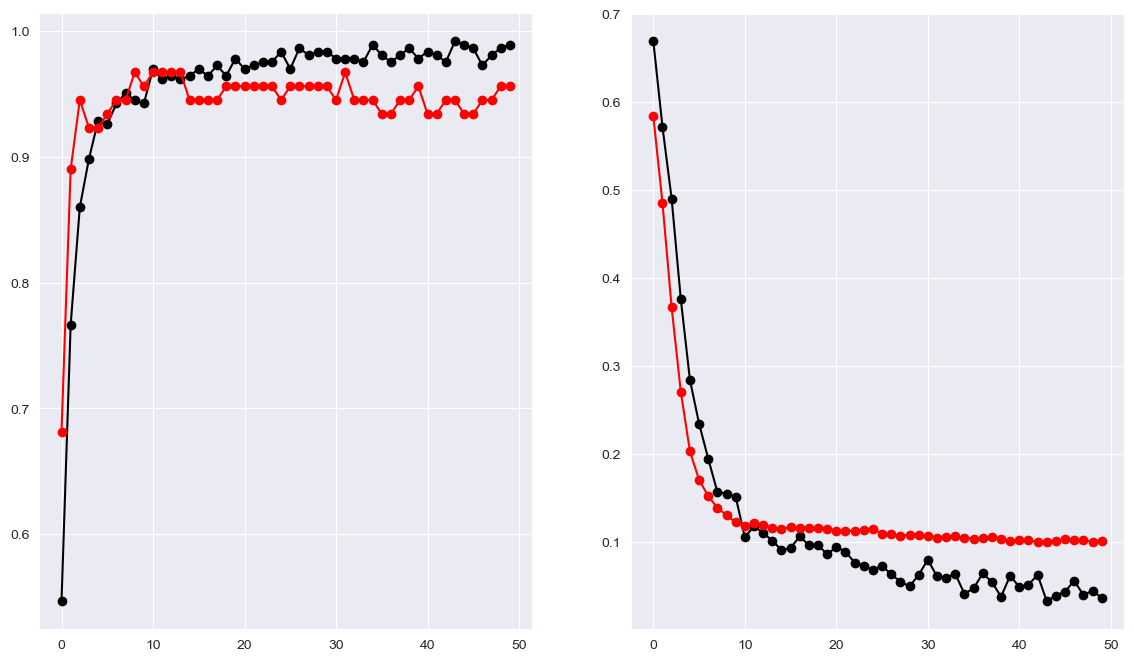

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,8))
epochs_=np.arange(50)
ax[0].plot(epochs_,history.history['accuracy'],'-o',color='black',label='train_acc')
ax[0].plot(epochs_,history.history['val_accuracy'],'-o',color='red',label='val_acc')
ax[1].plot(epochs_ , history.history['loss'] , '-o' ,color='black',label='train_loss')
ax[1].plot(epochs_ ,history.history['val_loss'] , 'r-o' ,color='red',label='val_loss')

In [17]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5
print('Accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print('F1_score:{}'.format(f1_score(y_test,y_pred)))

4/4 [==============================] - 0s 2ms/step
Accuracy:0.956140350877193
F1_score:0.9438202247191011


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

